In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

### FOREST FIRE

In [122]:
data = pd.read_csv('forestfires.csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [124]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [125]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [126]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [127]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [128]:
data['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [129]:
data['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [130]:
data1 = data[["month","day","FFMC","DMC","DC","ISI","temp","RH","wind","rain","area","size_category"]]
data1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [131]:
data1.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


<AxesSubplot:>

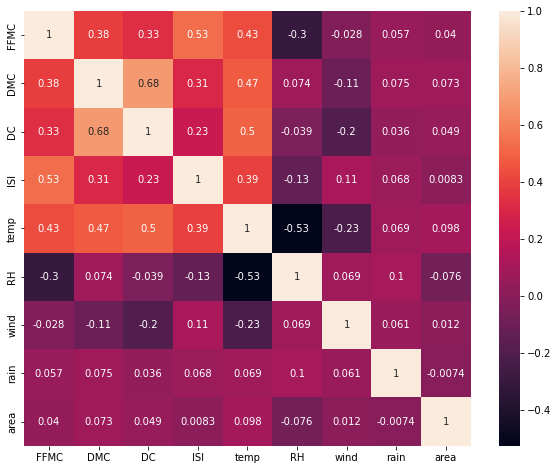

In [132]:
plt.figure(figsize=(10,8))
sns.heatmap(data1.corr(),annot = True)

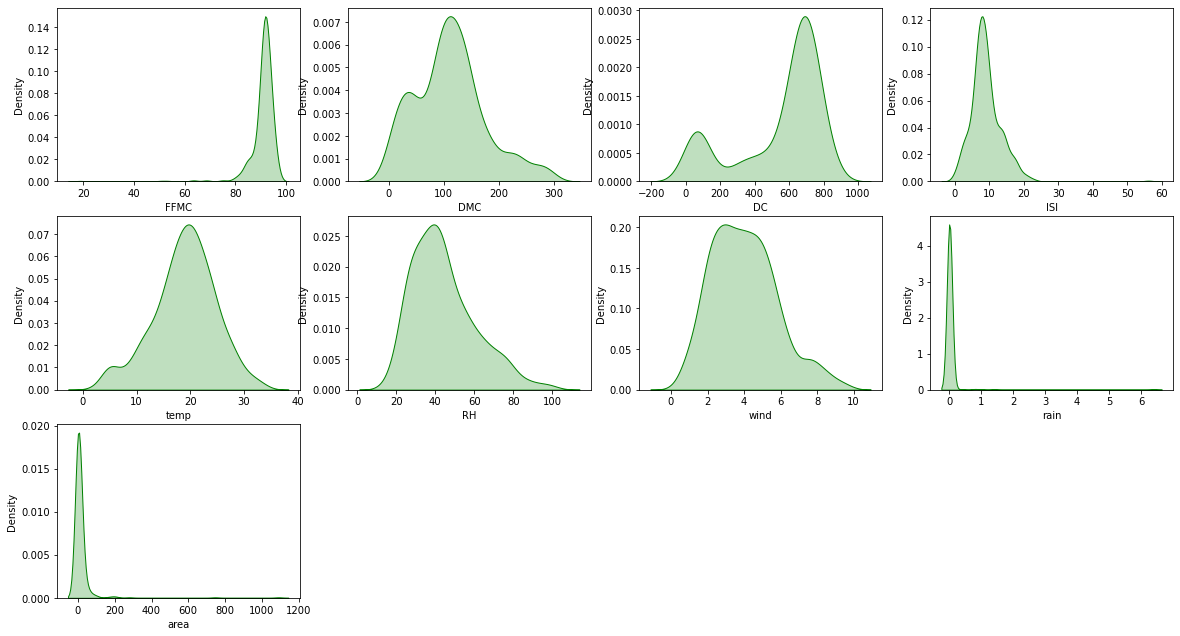

In [133]:
no_columns = data1.select_dtypes(exclude='object').columns.tolist()

plt.figure(figsize=(20,30))
for i,column in enumerate(no_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(data1[column],color='g',shade=True)

<AxesSubplot:>

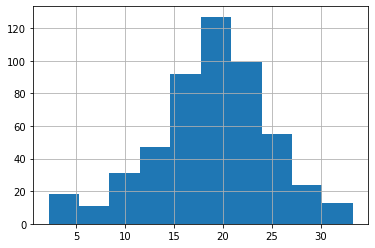

In [134]:
data['temp'].hist()

<AxesSubplot:>

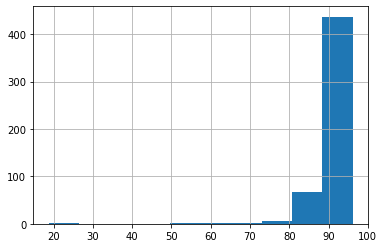

In [135]:
data['FFMC'].hist()

<AxesSubplot:>

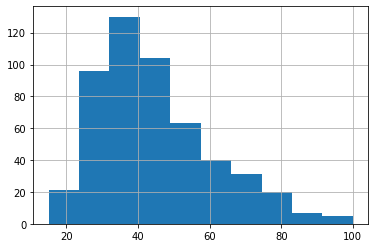

In [136]:
data['RH'].hist()

In [137]:
label_encoder = preprocessing.LabelEncoder()

In [138]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [139]:
data['size_category'] = label_encoder.fit_transform(data['size_category'])
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [140]:
X = data.iloc[:,2:11]
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [141]:
Y = data['size_category']
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [142]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [153]:
model = Sequential()
model.add(Dense(12, input_dim = 9, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [154]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model

In [155]:
model1 = model.fit(x_train ,y_train ,validation_split=0.33 ,epochs=250 ,batch_size=10)

Epoch 1/250
25/25 [==============================] - 1s 8ms/step - loss: 11.9224 - accuracy: 0.7220 - val_loss: 4.1958 - val_accuracy: 0.7417
Epoch 2/250
25/25 [==============================] - 0s 2ms/step - loss: 1.5163 - accuracy: 0.6556 - val_loss: 1.6886 - val_accuracy: 0.7500
Epoch 3/250
25/25 [==============================] - 0s 2ms/step - loss: 0.8275 - accuracy: 0.7510 - val_loss: 1.3388 - val_accuracy: 0.7667
Epoch 4/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.7967 - val_loss: 1.2426 - val_accuracy: 0.7667
Epoch 5/250
25/25 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.8299 - val_loss: 1.1147 - val_accuracy: 0.7667
Epoch 6/250
25/25 [==============================] - 0s 2ms/step - loss: 0.5570 - accuracy: 0.8050 - val_loss: 0.9517 - val_accuracy: 0.8333
Epoch 7/250
25/25 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.8382 - val_loss: 0.9162 - val_accuracy: 0.8083
Epoch 8/250


Epoch 59/250
25/25 [==============================] - 0s 2ms/step - loss: 0.2141 - accuracy: 0.9253 - val_loss: 0.4010 - val_accuracy: 0.9583
Epoch 60/250
25/25 [==============================] - 0s 3ms/step - loss: 0.1079 - accuracy: 0.9751 - val_loss: 0.4842 - val_accuracy: 0.9583
Epoch 61/250
25/25 [==============================] - 0s 2ms/step - loss: 0.2079 - accuracy: 0.9419 - val_loss: 0.4677 - val_accuracy: 0.9250
Epoch 62/250
25/25 [==============================] - 0s 3ms/step - loss: 0.1349 - accuracy: 0.9378 - val_loss: 0.4641 - val_accuracy: 0.9750
Epoch 63/250
25/25 [==============================] - 0s 2ms/step - loss: 0.1086 - accuracy: 0.9834 - val_loss: 0.4766 - val_accuracy: 0.9500
Epoch 64/250
25/25 [==============================] - 0s 2ms/step - loss: 0.1227 - accuracy: 0.9627 - val_loss: 0.5057 - val_accuracy: 0.9833
Epoch 65/250
25/25 [==============================] - 0s 3ms/step - loss: 0.1068 - accuracy: 0.9668 - val_loss: 0.5215 - val_accuracy: 0.9500
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 0.0511 - accuracy: 0.9959 - val_loss: 0.4271 - val_accuracy: 0.9833
Epoch 117/250
25/25 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 0.9959 - val_loss: 0.3810 - val_accuracy: 0.9833
Epoch 118/250
25/25 [==============================] - 0s 2ms/step - loss: 0.0478 - accuracy: 0.9834 - val_loss: 0.3725 - val_accuracy: 0.9667
Epoch 119/250
25/25 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9959 - val_loss: 0.3724 - val_accuracy: 0.9667
Epoch 120/250
25/25 [==============================] - 0s 2ms/step - loss: 0.0625 - accuracy: 0.9751 - val_loss: 0.5026 - val_accuracy: 0.9250
Epoch 121/250
25/25 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.9668 - val_loss: 0.4439 - val_accuracy: 0.9583
Epoch 122/250
25/25 [==============================] - 0s 3ms/step - loss: 0.0558 - accuracy: 0.9834 - val_loss: 0.3653 - val_accuracy: 0.9500
Epoch 123/250

25/25 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 0.9834 - val_loss: 0.2538 - val_accuracy: 0.9750
Epoch 174/250
25/25 [==============================] - 0s 2ms/step - loss: 0.0624 - accuracy: 0.9710 - val_loss: 0.3445 - val_accuracy: 0.9500
Epoch 175/250
25/25 [==============================] - 0s 2ms/step - loss: 0.1017 - accuracy: 0.9627 - val_loss: 0.2489 - val_accuracy: 0.9750
Epoch 176/250
25/25 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.9959 - val_loss: 0.2621 - val_accuracy: 0.9750
Epoch 177/250
25/25 [==============================] - 0s 2ms/step - loss: 0.0470 - accuracy: 0.9751 - val_loss: 0.2690 - val_accuracy: 0.9667
Epoch 178/250
25/25 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9959 - val_loss: 0.2390 - val_accuracy: 0.9833
Epoch 179/250
25/25 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.9834 - val_loss: 0.2397 - val_accuracy: 0.9833
Epoch 180/250

25/25 [==============================] - 0s 2ms/step - loss: 0.0262 - accuracy: 0.9876 - val_loss: 0.2508 - val_accuracy: 0.9917
Epoch 231/250
25/25 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 0.9917 - val_loss: 0.2513 - val_accuracy: 0.9833
Epoch 232/250
25/25 [==============================] - 0s 2ms/step - loss: 0.1389 - accuracy: 0.9502 - val_loss: 0.3872 - val_accuracy: 0.9250
Epoch 233/250
25/25 [==============================] - 0s 2ms/step - loss: 0.1285 - accuracy: 0.9668 - val_loss: 0.3093 - val_accuracy: 0.9500
Epoch 234/250
25/25 [==============================] - 0s 2ms/step - loss: 0.0442 - accuracy: 0.9751 - val_loss: 0.2613 - val_accuracy: 0.9750
Epoch 235/250
25/25 [==============================] - 0s 2ms/step - loss: 0.0704 - accuracy: 0.9585 - val_loss: 0.2700 - val_accuracy: 0.9667
Epoch 236/250
25/25 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9917 - val_loss: 0.2573 - val_accuracy: 0.9750
Epoch 237/250

In [156]:
score = model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.3835 - accuracy: 0.9359


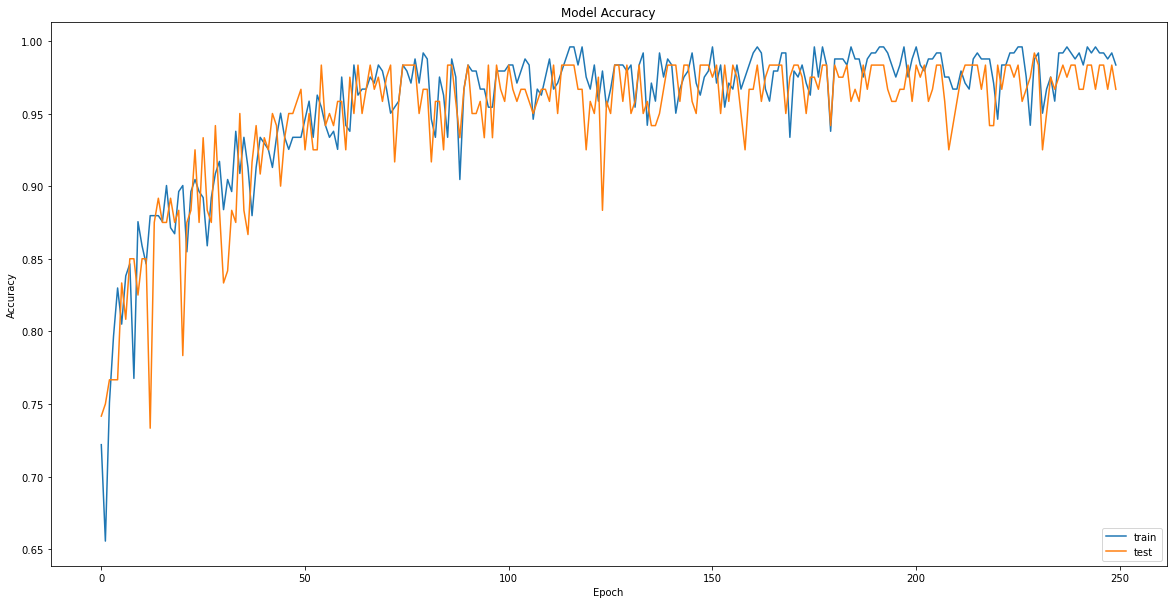

In [157]:
plt.figure(figsize=(20,10))
plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc = 'lower right')
plt.show()

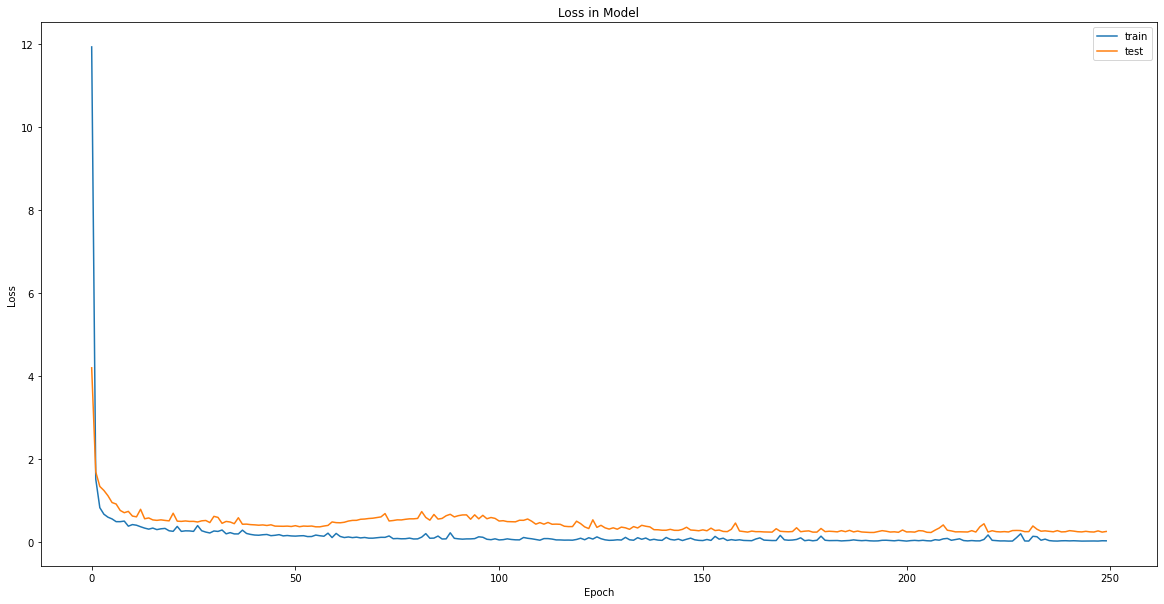

In [158]:
plt.figure(figsize = (20,10))
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('Loss in Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### GAS TURBINES

In [159]:
data = pd.read_csv('gas_turbines.csv')
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [161]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [162]:
data.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


<AxesSubplot:>

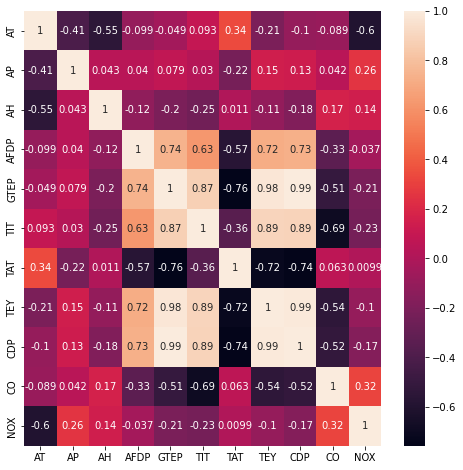

In [163]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot = True)

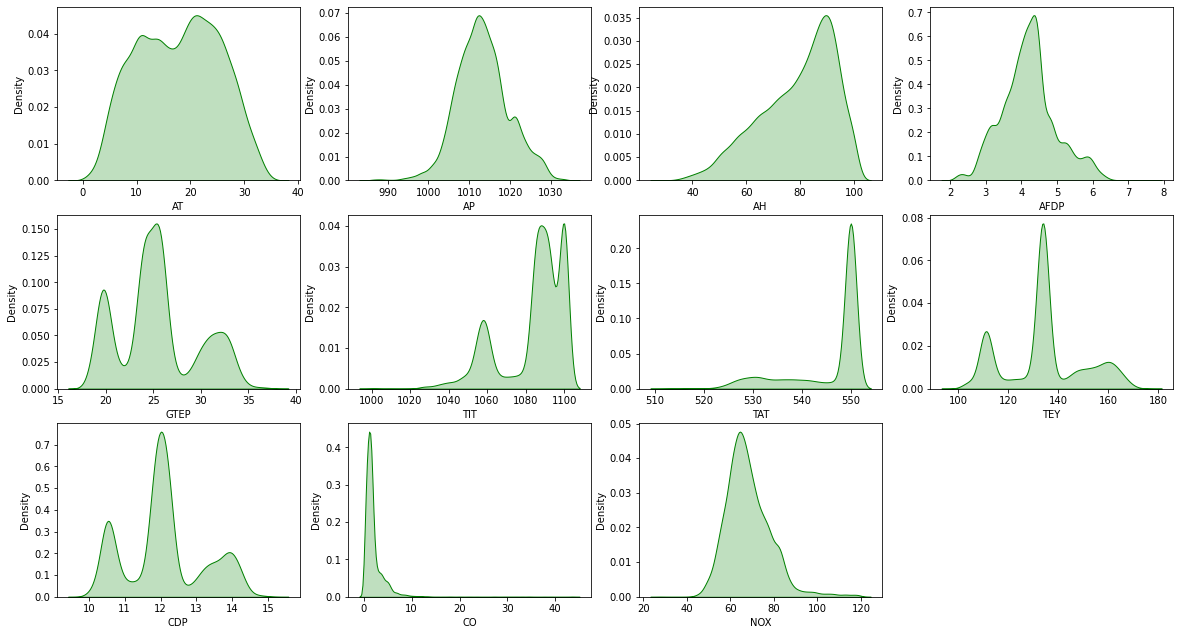

In [164]:
no_column = data.columns.tolist()

plt.figure(figsize=(20,30))
for i,column in enumerate(no_column,1):
    plt.subplot(8,4,i)
    sns.kdeplot(data[column],color='g',shade=True)

<Figure size 1080x720 with 0 Axes>

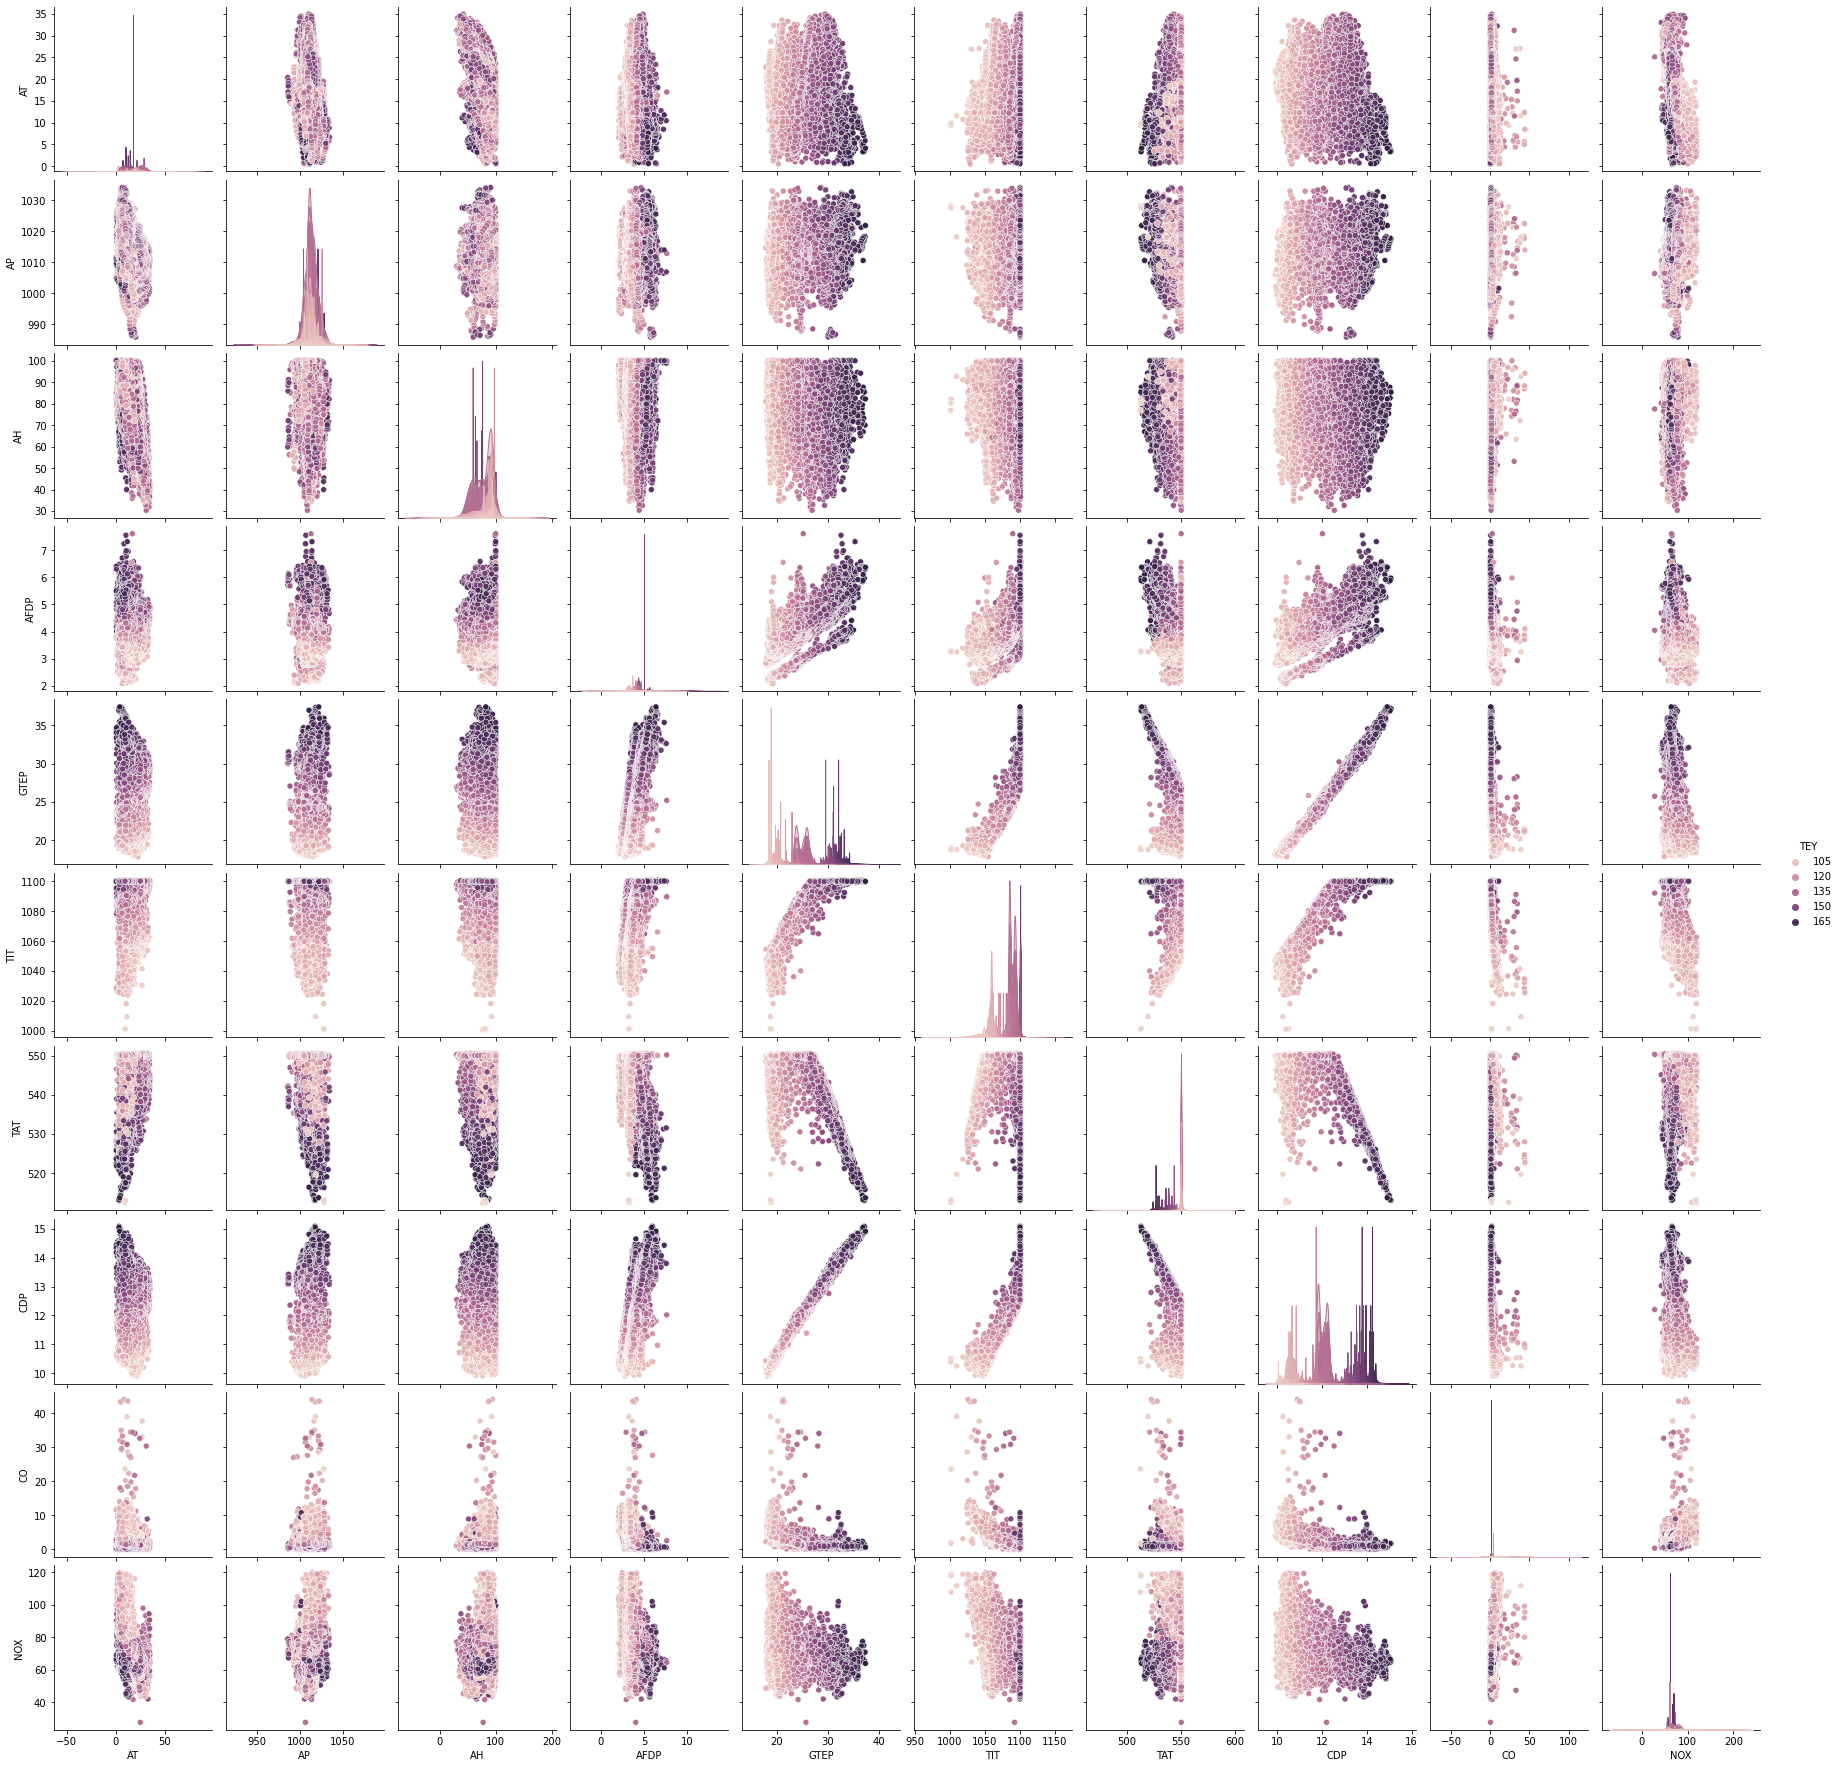

In [94]:
plt.figure(figsize=(15,10))
sns.pairplot(data,hue = 'TEY')
plt.show()

In [175]:
X = data
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [176]:
X = X.drop(['TEY'],axis = 1)

In [177]:
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [178]:
Y = data['TEY']
Y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [179]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [180]:
model = Sequential() # 0 level
model.add(Dense(12, input_dim=10,  activation='relu')) 
model.add(Dense(8,  activation='relu')) 
model.add(Dense(16, activation='sigmoid')) 
model.add(Dense(9, activation='tanh')) 
model.add(Dense(25, activation='leaky_relu'))

In [181]:
model.compile(loss = 'mse', optimizer = 'adam' , metrics=['mean_absolute_percentage_error'])

In [182]:
model1 = model.fit(x_train,y_train,validation_split = 0.30, epochs = 100,batch_size = 30)

Epoch 1/100
246/246 [==============================] - 1s 2ms/step - loss: 17932.7227 - mean_absolute_percentage_error: 98.9717 - val_loss: 17481.9922 - val_mean_absolute_percentage_error: 97.8133
Epoch 2/100
246/246 [==============================] - 0s 2ms/step - loss: 17164.7402 - mean_absolute_percentage_error: 96.7699 - val_loss: 16771.5820 - val_mean_absolute_percentage_error: 95.7474
Epoch 3/100
246/246 [==============================] - 0s 2ms/step - loss: 16488.8652 - mean_absolute_percentage_error: 94.7889 - val_loss: 16122.3506 - val_mean_absolute_percentage_error: 93.8201
Epoch 4/100
246/246 [==============================] - 0s 2ms/step - loss: 15855.4951 - mean_absolute_percentage_error: 92.8964 - val_loss: 15504.6670 - val_mean_absolute_percentage_error: 91.9494
Epoch 5/100
246/246 [==============================] - 0s 2ms/step - loss: 15248.8945 - mean_absolute_percentage_error: 91.0437 - val_loss: 14909.8486 - val_mean_absolute_percentage_error: 90.1118
Epoch 6/100
246

Epoch 43/100
246/246 [==============================] - 0s 2ms/step - loss: 1763.1907 - mean_absolute_percentage_error: 27.9369 - val_loss: 1669.9420 - val_mean_absolute_percentage_error: 27.1128
Epoch 44/100
246/246 [==============================] - 0s 2ms/step - loss: 1612.8625 - mean_absolute_percentage_error: 26.4342 - val_loss: 1524.7958 - val_mean_absolute_percentage_error: 25.6200
Epoch 45/100
246/246 [==============================] - 0s 2ms/step - loss: 1471.7310 - mean_absolute_percentage_error: 24.9571 - val_loss: 1388.9701 - val_mean_absolute_percentage_error: 24.1442
Epoch 46/100
246/246 [==============================] - 0s 2ms/step - loss: 1339.6763 - mean_absolute_percentage_error: 23.4865 - val_loss: 1261.9539 - val_mean_absolute_percentage_error: 22.6836
Epoch 47/100
246/246 [==============================] - 0s 2ms/step - loss: 1216.5646 - mean_absolute_percentage_error: 22.0406 - val_loss: 1143.9064 - val_mean_absolute_percentage_error: 21.2534
Epoch 48/100
246/246

246/246 [==============================] - 0s 2ms/step - loss: 251.1978 - mean_absolute_percentage_error: 8.5667 - val_loss: 246.5371 - val_mean_absolute_percentage_error: 8.4344
Epoch 86/100
246/246 [==============================] - 0s 2ms/step - loss: 251.1909 - mean_absolute_percentage_error: 8.5604 - val_loss: 246.5374 - val_mean_absolute_percentage_error: 8.4346
Epoch 87/100
246/246 [==============================] - 0s 1ms/step - loss: 251.1910 - mean_absolute_percentage_error: 8.5708 - val_loss: 246.5632 - val_mean_absolute_percentage_error: 8.4512
Epoch 88/100
246/246 [==============================] - 0s 2ms/step - loss: 251.1826 - mean_absolute_percentage_error: 8.5818 - val_loss: 246.5438 - val_mean_absolute_percentage_error: 8.4393
Epoch 89/100
246/246 [==============================] - 0s 2ms/step - loss: 251.1875 - mean_absolute_percentage_error: 8.5701 - val_loss: 246.5364 - val_mean_absolute_percentage_error: 8.4338
Epoch 90/100
246/246 [==============================]

In [183]:
score = model.evaluate(x_test,y_test)

141/141 [==============================] - 0s 1ms/step - loss: 252.4554 - mean_absolute_percentage_error: 8.6224


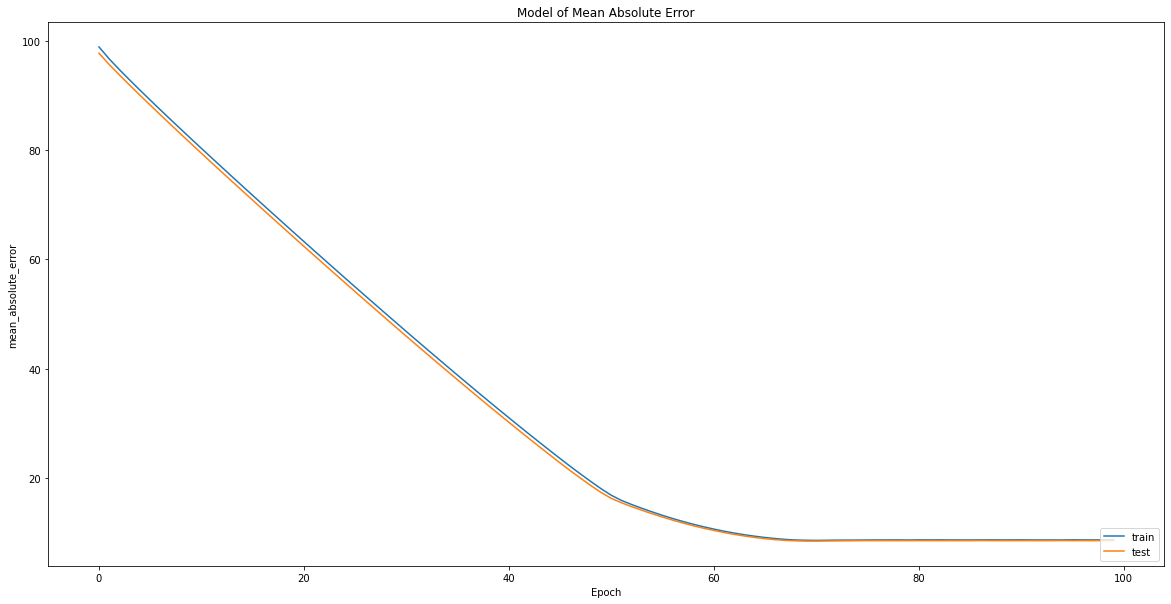

In [185]:
plt.figure(figsize=(20,10))
plt.plot(model1.history['mean_absolute_percentage_error'])
plt.plot(model1.history['val_mean_absolute_percentage_error'])
plt.title('Model of Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('mean_absolute_error')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

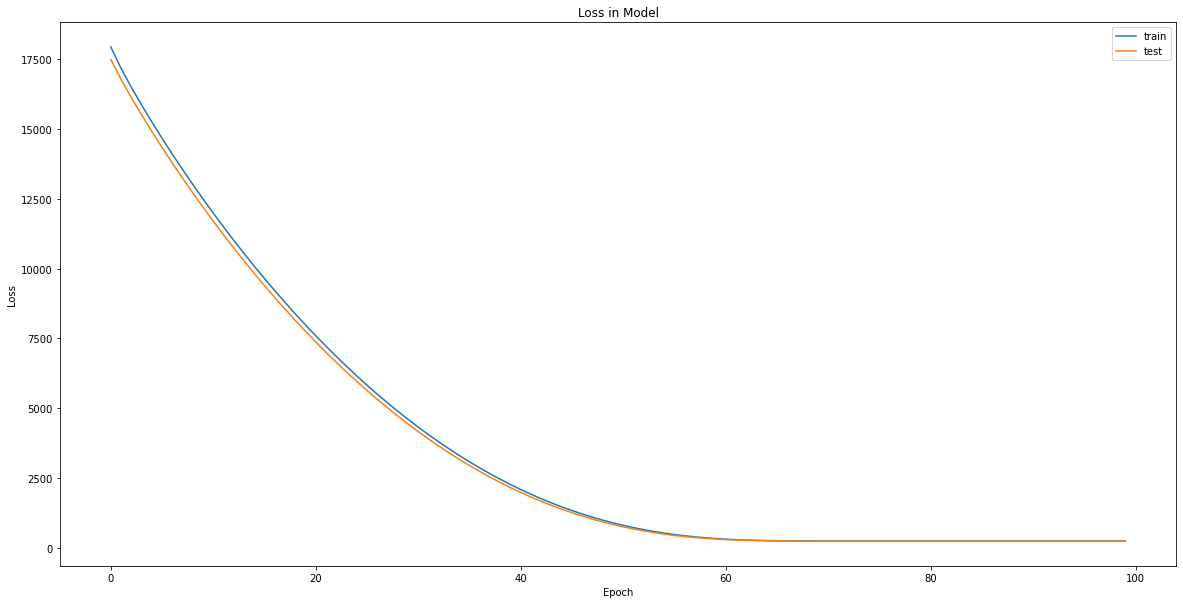

In [186]:
plt.figure(figsize = (20,10))
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('Loss in Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

#### END OF ASSIGNMENT